### Artificial Neural Networks Model: Keras Regressor

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv("cleandata.csv", index_col='datetime', parse_dates=True)

In [6]:
dfc = df.copy()

In [7]:
dummy_season = pd.get_dummies(dfc.season, prefix='season')
dummy_season.sample(n=5,random_state = 12)

dummy_weather = pd.get_dummies(dfc.weather, prefix='weather')
dummy_weather.sample(n=5, random_state = 12)

dummy_hour = pd.get_dummies(dfc.hour, prefix='hour')
dummy_hour.sample(n=5, random_state = 12)

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-10 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-11-05 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2012-12-08 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011-06-10 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
dfc = pd.concat([dfc, dummy_hour], axis=1)
dfc = pd.concat([dfc, dummy_weather], axis=1)
dfc = pd.concat([dfc, dummy_season], axis=1)

In [9]:
dfc.drop(['hour','season','weather','atemp','casual','registered'], axis = 1, inplace=True)

In [10]:
X = dfc[['temp','hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23','weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4']]


In [11]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X) #Standardization Technique

In [12]:
y = dfc[['rentals']]

#### Training & Testing Dataset Split 

In [13]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.25, random_state=100)

### Import necessary libraries for building NN

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

Using TensorFlow backend.


In [16]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV # CV 

#### Model Building

In [17]:
def create_model(layers, activation):
  model = Sequential()
  for i, nodes in enumerate(layers):
    if i == 0:
      model.add(Dense(nodes,input_dim=X_train.shape[1]))
      model.add(Activation(activation))
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
    model.add(Dense(1)) # No activation beyond this point

    model.compile(optimizer='adam', loss='mean_absolute_error', metrics = ['mae'])
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)

In [18]:
model

In [26]:
import tensorflow as tf

In [55]:

layers = [[24],[24,12],[24,12,6],[1024,256]]
activations = ['sigmoid','relu']

param_grid = dict(layers=layers, activation=activations, batch_size = [128,256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [56]:
grid_result = grid.fit(X_train, y_train)

In [57]:
[grid_result.best_score_, grid_result.best_params_]

[-62.239584915049065,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [1024, 256]}]

### Performance Evaluation

In [58]:
pred_y = grid.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,pred_y))


90.92101270029961

In [59]:
metrics.mean_squared_error(y_test,pred_y)

8266.630550448042

In [81]:
new_df=y_test.copy()
new_df['pred']=pred_y
new_df=new_df.sort_index()
new_df

,rentals,pred
datetime,,
2011-01-01 01:00:00,40,7.270634
2011-01-01 03:00:00,13,2.760237
2011-01-01 12:00:00,84,172.875244
2011-01-01 21:00:00,34,93.229950
2011-01-01 22:00:00,28,85.271835
...,...,...
2012-12-19 04:00:00,7,5.713345
2012-12-19 10:00:00,164,175.627655
2012-12-19 17:00:00,562,435.856689


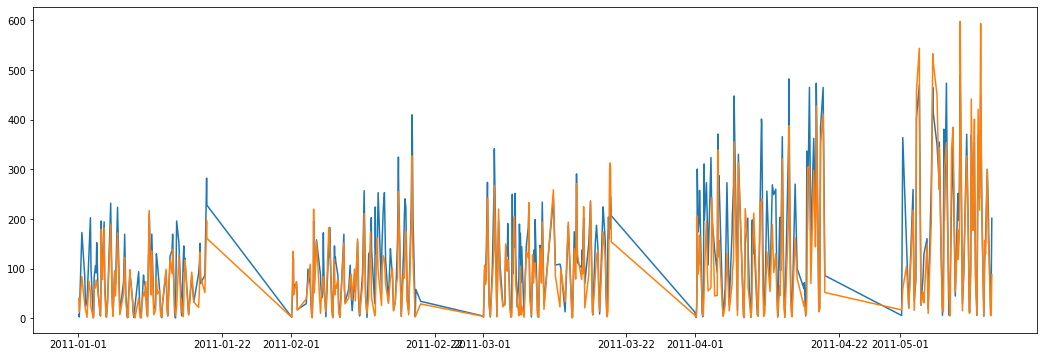

In [88]:
plt.figure(figsize=(18, 6))
plt.plot(new_df['pred'][0:500])
plt.plot(new_df['rentals'][0:500])